In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [34]:
#1. load the data into a pandas DataFrame
#This dataset did not come with a header/column names, so we will specify that when loading the data and manually add
#the column names ourselves

In [35]:
data = pd.read_csv('car_evaluation.csv', header=None)
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [36]:
#checking missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [37]:
#there are no missing valye in the data. THe data contains 1728 entries and each columns have 1728 non-null

In [38]:
#if we create countplots of each attribute, we can see that there seems to be an equal balance of each unique type in
#each column

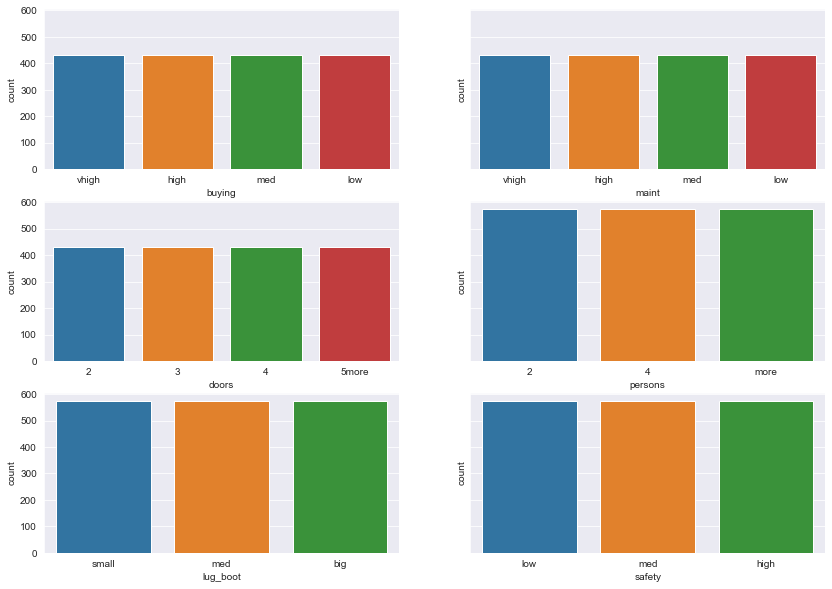

In [39]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharey = True, figsize = (14,10))

sns.countplot(x = data['buying'], ax = axes[0][0])
sns.countplot(x = data['maint'], ax = axes[0][1])
sns.countplot(x = data['doors'], ax = axes[1][0])
sns.countplot(x = data['persons'], ax = axes[1][1])
sns.countplot(x = data['lug_boot'], ax = axes[2][0])
sns.countplot(x = data['safety'], ax = axes[2][1])

plt.show()

In [40]:
#looking at target/class variable

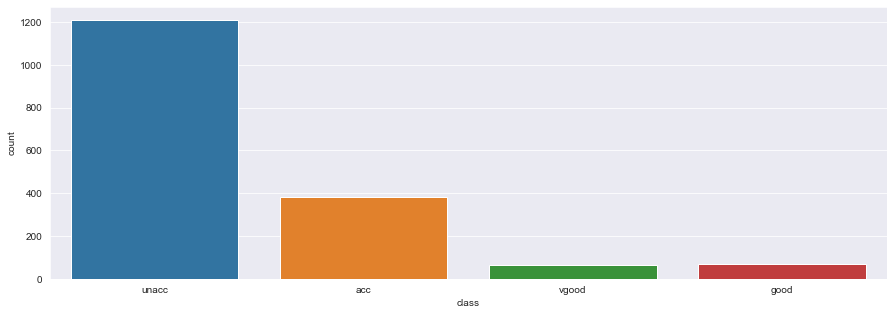

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [41]:
sns.countplot(x = data['class'])
plt.show()
data['class'].value_counts()

In [42]:
#DATA PREPROCESSING

In [43]:
#when dealing with ordinal categorical variables, we need to preserve the order when encoding them
#we can't use one hot encoding/ get_dummies here because that won't preserve the order

In [44]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [45]:
#one way to do the encoding is first create mapping that preserve the order in each column

In [46]:
buying_mappings = {'low':0, 'med':1, 'high':2, 'vhigh':3}
maint_mappings = {'low':0, 'med':1, 'high':2, 'vhigh':3}
doors_mappings = {'2':2, '3':3, '4':4, '5more':5}
persons_mappings = {'2':2, '4':4, 'more':5}
lug_boot_mappings = {'small':0, 'med':1, 'big':2}
safety_mappings = {'low':0, 'med':1, 'high':2}
class_mappings = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}

In [47]:
#we can then pass use pandas .map(dictionary) to apply mapping to the necessarcy columns

In [48]:
data['buying'] = data['buying'].map(buying_mappings)
data['maint'] = data['maint'].map(maint_mappings)
data['doors'] = data['doors'].map(doors_mappings)
data['persons'] = data['persons'].map(persons_mappings)
data['lug_boot'] = data['lug_boot'].map(lug_boot_mappings)
data['safety'] = data['safety'].map(safety_mappings)
data['class'] = data['class'].map(class_mappings)

In [49]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


In [50]:
#now the data is ready for training

In [51]:
#Creating Tree Models

In [52]:
#1. split data into training and testing sets -> train_test_split(X, y, test_size)

In [53]:
from sklearn.model_selection import train_test_split

x = data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [54]:
#import sklearn decisiontreeclassifer model and being training it using the fit(train_data, train_data_labels)

In [56]:
from sklearn.tree import DecisionTreeClassifier

#instantiate the decisiontreeclassifer model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)

#fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [57]:
#Model Evaluation

In [58]:
#predicting the test set result with creiterion gini index
y_pred_gini = clf_gini.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with creiterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with creiterion gini index: 0.7746


In [60]:
#compare the train-set and test-set accuracy and check for overfitting

In [61]:
y_pred_train_gini = clf_gini.predict(x_train)
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.7792
Test set score: 0.7746


In [62]:
#Visualizing decision-trees

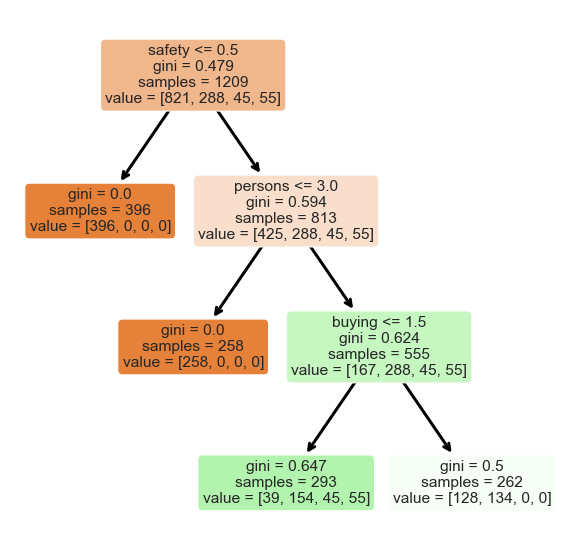

In [65]:
#from sklearn import tree
#tree.plot_tree(clf_gini)
#plt.show()

fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf_gini, filled = True, rounded = True,
                     feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

In [66]:
#Randome Forests

In [67]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [70]:
rfc_pred = rfc.predict(x_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, rfc_pred)))

Model accuracy score: 0.9846
